In [1]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from numpy import median
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pylab import rcParams
import matplotlib
from collections import Counter

In [2]:
#loads the movie dataset with release date
def load_tmdb_movies(path):
    file = pd.read_csv(path)
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv")
test.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test_credits = load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv")
test_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [4]:
#LOAD CSV's 
movies = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv")
credits = load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv")


In [5]:
# THESE FUNCTIONS ARE IF WE NEED EXTRA FIELDS LATER from imdb ofc taken from https://www.kaggle.com/tanetboss/beginner-binary-classification-for-nice-movie/notebook#Ok-let-check-the-feature-importance
#GOAL to predict if a movie is nice before it releases 
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    tmdb_movies['title_month'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.month)

    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [6]:
pretreated_data = convert_to_original_format(movies, credits)
pretreated_data.head()

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,title_year,title_month,country,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,2009.0,12.0,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2007.0,5.0,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,2015.0,10.0,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,2012.0,7.0,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,2012.0,3.0,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN


In [7]:
#cleaning up missing data and irrelevant fields aka just hompage rn 
#the following is just to show which columns have null values 
# total = data.isnull().sum().sort_values(ascending=False)
# percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(5)
pretreated_data.drop(['homepage'], axis=1, inplace=True)

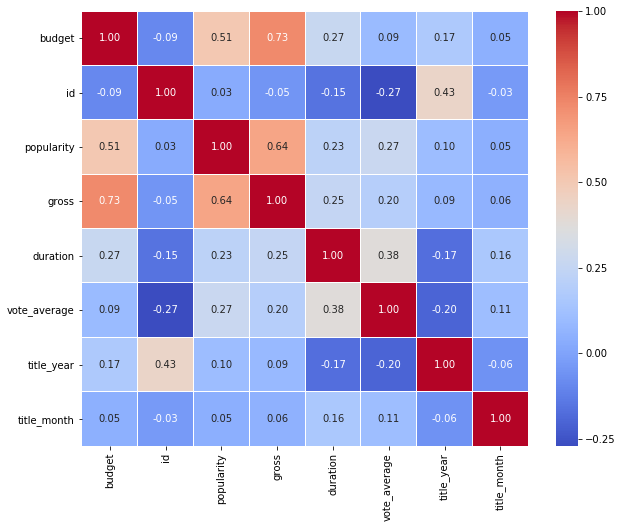

In [8]:
#dropping irel features 2 
pretreated_data.drop(['num_voted_users'], axis=1, inplace=True)
#correlation matrix with numerical values 
plt.figure(figsize = (10,8))
g = sns.heatmap(pretreated_data[list(pretreated_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

In [9]:
#title year and vote average + duration cleaup 
pretreated_data = pretreated_data[pretreated_data['vote_average'] != 0]
pretreated_data = pretreated_data[pretreated_data['duration'] != 0]
pretreated_data.columns
data= pretreated_data.copy()

In [10]:
#This part is for converting all the appropriate fields into 1's and 0's for classification 

In [11]:
#convert budget into 1's and 0's for budget: 
import statistics
sd = statistics.stdev(data.budget)
mean = data.budget.mean()
max = data.budget.max()
min = data.budget.min()

#these are hard coded amount of fields and values we can change this accordingly 
#these are def arbitrarly set into 
data['reallylow'] = data['budget'].map(lambda s: 1 if s < 10000000 else 0)
data['low'] = data['budget'].map(lambda s: 1 if 10000000 <= s < mean else 0)
data['avg'] = data['budget'].map(lambda s: 1 if  mean <= s < mean+sd  else 0)
data['high'] = data['budget'].map(lambda s: 1 if mean+sd <= s < 100000000 else 0)
data['blockbusterhigh'] = data['budget'].map(lambda s: 1 if s >= 100000000 else 0)

In [12]:
data.head()

,budget,genres,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,...,actor_2_name,actor_3_name,companies_1,companies_2,companies_3,reallylow,low,avg,high,blockbusterhigh
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,0,0,0,0,1
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,0,0,0,0,1
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,0,0,0,0,1
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,0,0,0,0,1
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN,0,0,0,0,1


In [13]:
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh'],
      dtype='object')

In [14]:
#convert month to season 
data['Spring'] = data['title_month'].map(lambda s: 1 if 1 <= s <= 4 else 0)
data['Summer'] = data['title_month'].map(lambda s: 1 if 5 <= s <= 7 else 0)
data['Fall'] = data['title_month'].map(lambda s: 1 if 8 <= s <= 9 else 0)
data['Winter'] = data['title_month'].map(lambda s: 1 if 10 <= s <= 12 else 0) 

In [15]:
#duration 
data = data[np.isfinite(data['duration'])]
data['Lessthan90'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
data['90-120'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
data['Morethan120'] = data['duration'].map(lambda s: 1 if   s >= 120  else 0)
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh',
       'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90', '90-120',
       'Morethan120'],
      dtype='object')

In [16]:
data['Lessthan90'] = data['duration'].map(lambda s: 1 if s < 90 else 0)
data['90-120'] = data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
data['Morethan120'] = data['duration'].map(lambda s: 1 if   s >= 120  else 0)
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh',
       'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90', '90-120',
       'Morethan120'],
      dtype='object')

In [17]:
#genre
# impact on cross-validation scores:
# popularity success -> +3
# vote success -> +2.5-3
# commercial success -> -4.5-5
data['genres'].head()
genresUnflattened = list(map(lambda x: x.split('|'), data['genres']))
genres = set([item for subl in genresUnflattened for item in subl])
genres.remove('')
for genre in genres:
    data[genre] = data['genres'].map(lambda s: 1 if genre in str(s) else 0)
# data1.head()
data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh',
       'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90', '90-120',
       'Morethan120', 'Science Fiction', 'Foreign', 'Fantasy', 'Family',
       'Horror', 'Music', 'Crime', 'Thriller', 'War', 'Adventure', 'History',
       'Romance', 'Mystery', 'Western', 'Comedy', 'TV Movie', 'Animation',
       'Documentary', 'Action', 'Drama'],
      dtype='object')

In [18]:
#from this point on its going to be data specific: so entry point for doing the 3 successes

In [19]:
#Popularity  > avg_popularity 

In [243]:
#Actually these are the 3 success in a nutshell
popularity_data = data.copy()
popularity_data['Popularity Success'] = popularity_data['popularity'].map(lambda s :1  if s >= popularity_data['popularity'].mean() else 0) 
popularity_data['Vote Success'] = popularity_data['vote_average'].map(lambda s :1  if s >= popularity_data['vote_average'].mean() else 0)
popularity_data['Commercial Success'] = popularity_data['gross'] > popularity_data['budget']
popularity_data['Commercial Success'] = popularity_data['Commercial Success'].astype(int)


#metrics for true success
# svm accuracy scores: conditionAll ~= 79% > condition1orMore ~= 75% > condition2orMore ~= 55%
condition2orMore = (((popularity_data['Popularity Success'] == 1) & (popularity_data['Vote Success'] == 1)) | 
             ((popularity_data['Popularity Success'] == 1) & (popularity_data['Commercial Success'] == 1)) | 
             ((popularity_data['Commercial Success'] == 1) & (popularity_data['Vote Success'] == 1)))

condition1orMore = ((popularity_data['Popularity Success'] == 1) | 
                 (popularity_data['Vote Success'] == 1) | 
                 (popularity_data['Commercial Success'] == 1))

conditionAll = ((popularity_data['Popularity Success'] == 1) & 
                 (popularity_data['Vote Success'] == 1) & 
                 (popularity_data['Commercial Success'] == 1))

popularity_data['True Success'] = np.where(conditionAll, 1, 0)


In [244]:
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'title_month', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh',
       'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90', '90-120',
       'Morethan120', 'Science Fiction', 'Foreign', 'Fantasy', 'Family',
       'Horror', 'Music', 'Crime', 'Thriller', 'War', 'Adventure', 'History',
       'Romance', 'Mystery', 'Western', 'Comedy', 'TV Movie', 'Animation',
       'Documentary', 'Action', 'Drama', 'Popularity Success', 'Vote Success',
       'Commercial Success', 'True Success'],
      dtype='object')

In [245]:
#Let's do some visualizations on the features x Success before we drop all the useless fields 

/Users/tonyzhang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


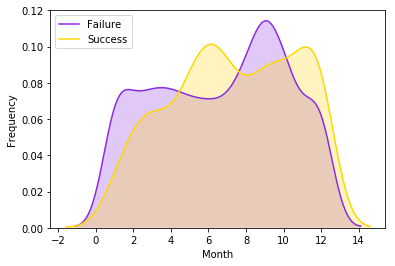

In [246]:
#title_month
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.title_month[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Month")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

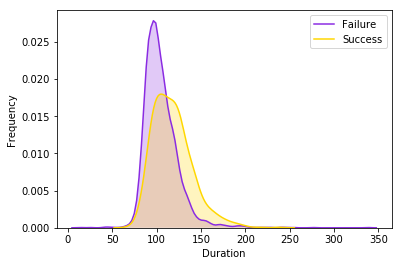

In [247]:
#duration 
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 0) ], color="blueviolet", shade = True)
g = sns.kdeplot(popularity_data.duration[(popularity_data["True Success"] == 1) ], ax =g, color="gold", shade= True)
g.set_xlabel("Duration")
g.set_ylabel("Frequency")
g = g.legend(["Failure","Success"])

In [248]:
#time to drop the fields 

In [249]:
#title_year IS NOT dropped atm for testing of months ; duration 
popularity_data.drop(['id','budget','original_title','overview','spoken_languages','production_companies','production_countries','release_date','status',
          'tagline','movie_title','vote_average','language','director_name','actor_1_name','actor_2_name','actor_3_name',
          'companies_1','companies_2','companies_3','country','genres','plot_keywords','popularity','gross', 'title_month', 'duration'], axis=1, inplace=True)
popularity_data.columns

Index(['title_year', 'reallylow', 'low', 'avg', 'high', 'blockbusterhigh',
       'Spring', 'Summer', 'Fall', 'Winter', 'Lessthan90', '90-120',
       'Morethan120', 'Science Fiction', 'Foreign', 'Fantasy', 'Family',
       'Horror', 'Music', 'Crime', 'Thriller', 'War', 'Adventure', 'History',
       'Romance', 'Mystery', 'Western', 'Comedy', 'TV Movie', 'Animation',
       'Documentary', 'Action', 'Drama', 'Popularity Success', 'Vote Success',
       'Commercial Success', 'True Success'],
      dtype='object')

In [250]:
# don't include genres
# popularity_data.drop(['TV Movie', 'History', 'Thriller', 'Fantasy', 'Adventure', 'Horror', 'Family', 'Music', 'Animation', 'Foreign', 'Science Fiction', 'Crime', 'War', 'Mystery','Drama', 'Western', 'Action', 'Romance', 'Comedy', 'Documentary'], axis=1, inplace=True)
# popularity_data.columns

In [251]:
#when running aggregate/success drop the other success metics 
popularity_data.drop(['Popularity Success', 'Vote Success', 'Commercial Success'], axis=1, inplace=True)

In [252]:
popularity_data

,title_year,reallylow,low,avg,high,blockbusterhigh,Spring,Summer,Fall,Winter,...,Romance,Mystery,Western,Comedy,TV Movie,Animation,Documentary,Action,Drama,True Success
0,2009.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2007.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2015.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,2012.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
4,2012.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2007.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2010.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
7,2015.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,2009.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2016.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [253]:
#Decision Tree time: for popularity first: 

In [316]:

popularity_data['is_train'] = np.random.uniform(0, 1, len(popularity_data)) <= .75


In [317]:
train, test = popularity_data[popularity_data['is_train']==True], popularity_data[popularity_data['is_train']==False]
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

# Let's test against different Success Metrics 

# train["Popularity Success"] = train["Popularity Success"].astype(int)

# Y_train = train["Popularity Success"]
# X_train = train.drop(labels = ["Popularity Success"],axis = 1)

# Y_test = test["Popularity Success"]
# X_test = test.drop(labels = ["Popularity Success"],axis = 1)

# train["Vote Success"] = train["Vote Success"].astype(int)

# Y_train = train["Vote Success"]
# X_train = train.drop(labels = ["Vote Success"],axis = 1)

# Y_test = test["Vote Success"]
# X_test = test.drop(labels = ["Vote Success"],axis = 1)

# train["Commercial Success"] = train["Commercial Success"].astype(int)

# Y_train = train["Commercial Success"]
# X_train = train.drop(labels = ["Commercial Success"],axis = 1)

# Y_test = test["Commercial Success"]
# X_test = test.drop(labels = ["Commercial Success"],axis = 1)

# train["True Success"] = train["True Success"].astype(int)

Y_train = train["True Success"]
X_train = train.drop(labels = ["True Success"],axis = 1)

Y_test = test["True Success"]
X_test = test.drop(labels = ["True Success"],axis = 1)


/Users/tonyzhang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [318]:
print(len(train))


3507


In [319]:
print(len(test))

1209


In [320]:
#heres the decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [321]:
from sklearn.model_selection import  cross_val_score
# Decision Tree - Cross Validation Score 
c_dec = cross_val_score(clf, X_train, Y_train, cv=10)
c_dec.mean()

0.6586225764975764

In [322]:
result = clf.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

Dec_result = pd.DataFrame(result[:,1])
Dec_result['Predict'] = Dec_result[0].map(lambda s: 1 if s >= 0.5  else 0)
Dec_result['testAnswer'] = pd.DataFrame(test_result)

Dec_result['Correct'] = np.where((Dec_result['Predict'] == Dec_result['testAnswer']), 1, 0)
Dec_result.head()

,0,Predict,testAnswer,Correct
0,0.0,0,1,0
1,1.0,1,0,0
2,1.0,1,1,1
3,1.0,1,0,0
4,0.0,0,1,0


In [323]:
#test Data set - score 
Dec_result['Correct'].mean()


0.7328370554177006

In [324]:
#heres a random forest tree model 
from sklearn.ensemble import RandomForestClassifier

Rfclf = RandomForestClassifier()
Rfclf.fit(X_train, Y_train)


/Users/tonyzhang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [325]:
#Random Forest - cross validation score 
c_rf =  cross_val_score(Rfclf, X_train, Y_train, cv=10)
c_rf.mean()

0.7087758167758168

In [326]:
result = Rfclf.predict_proba(X_test)[:]
Rf_result = pd.DataFrame(result[:,1])
Rf_result['Predict'] = Rf_result[0].map(lambda s: 1 if s >= 0.5  else 0)
Rf_result['testAnswer'] = pd.DataFrame(test_result)

Rf_result['Correct'] = np.where((Rf_result['Predict'] == Rf_result['testAnswer'])
                     , 1, 0)
Rf_result.head()

,0,Predict,testAnswer,Correct
0,0.1,0,1,0
1,1.0,1,0,0
2,0.9,1,1,1
3,0.4,0,0,1
4,0.0,0,1,0


In [327]:
Rf_result['Correct'].mean()


0.7551695616211745

In [328]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100) #can play around with this (neighbors)
knn.fit(X_train, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [329]:
c_knn = cross_val_score(knn, X_train, Y_train, cv=10) 
c_knn.mean()

0.7832894882894883

In [330]:
result = knn.predict_proba(X_test)[:]
knn_result = pd.DataFrame(result[:,1])
knn_result['Predict'] = knn_result[0].map(lambda s: 1 if s >= 0.5  else 0)
knn_result['testAnswer'] = pd.DataFrame(test_result)

knn_result['Correct'] = np.where((knn_result['Predict'] == knn_result['testAnswer'])
                     , 1, 0)
knn_result.head()

,0,Predict,testAnswer,Correct
0,0.38,0,1,0
1,0.43,0,0,1
2,0.24,0,1,0
3,0.41,0,0,1
4,0.53,1,1,1


In [331]:
knn_result['Correct'].mean()


0.8006617038875103

In [332]:
#Ok i wonder why KNN is the strongest? it seems like all features are important and there aren't too many irrelevant features 

In [333]:
from sklearn import svm
svm_fit = svm.SVC(gamma='scale', probability=True)
svm_fit.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [334]:
c_svm = cross_val_score(svm_fit, X_train, Y_train, cv=10) 
c_svm.mean()

0.7827213064713064

In [335]:
#trying to get svm to work??
result = svm_fit.predict_proba(X_test)
svm_result = pd.DataFrame(result[:,1])
svm_result['Predict'] = svm_result[0].map(lambda s: 1 if s >= 0.5  else 0)
svm_result['testAnswer'] = pd.DataFrame(test_result)
svm_result['Correct'] = np.where((svm_result['Predict'] == svm_result['testAnswer'])
                     , 1, 0)
svm_result


,0,Predict,testAnswer,Correct
0,0.663937,1,1,1
1,0.650982,1,0,0
2,0.656549,1,1,1
3,0.668965,1,0,0
4,0.648202,1,1,1
5,0.661302,1,1,1
6,0.656565,1,1,1
7,0.669612,1,1,1
8,0.635642,1,1,1
9,0.669892,1,1,1


In [336]:
svm_result['Correct'].mean()

0.8072787427626137

In [275]:
#this part is to check the feature importances to see which ones we can remove 

In [276]:
#decision tree 
dec_fea = pd.DataFrame(clf.feature_importances_)
dec_fea["name"] = list(X_train) 
dec_fea.sort_values(by=0, ascending=False).head()

,0,name
0,0.254595,title_year
1,0.072364,reallylow
12,0.048465,Morethan120
32,0.040128,Drama
20,0.040029,Thriller


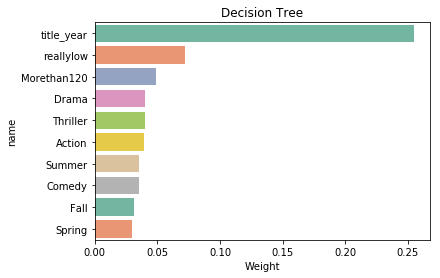

In [277]:
g = sns.barplot(0,"name",data = dec_fea.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Decision Tree")

In [55]:
#ok wtf why it seems budget had the most weight on this decision tree lul ... looks like time didnt have to do with much 

In [56]:
#random forest 
rf_fea = pd.DataFrame(Rfclf.feature_importances_)
rf_fea["name"] = list(X_train) 
rf_fea.sort_values(by=0, ascending=False).head()

,0,name
0,0.344615,title_year
22,0.041480,Romance
16,0.040413,Comedy
1,0.039765,reallylow
14,0.037659,Drama


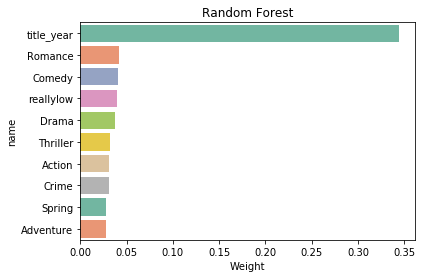

In [57]:
g = sns.barplot(0,"name",data = rf_fea.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

In [58]:
#also really low budget and a bunch of genres 